## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [13]:
df = pd.read_csv('copy1.csv')
df.head()

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,...,games_injured,award,current_value,highest_value,winger,goals_total,assists_total,yellow cards_total,second yellow cards_total,red cards_total
0,6,Manchester United,Victor Lindelأ¶f,Defender,187.0,28.0,70,0.000000,0.032901,0.115153,...,19,10,15000000,35000000,0,0.000000,2.303052,8.060684,0.0,0.000000
1,8,Manchester United,Teden Mengi,Defender,186.0,21.0,34,0.000000,0.000000,0.130529,...,13,0,2000000,2000000,0,0.000000,0.000000,4.437999,0.0,0.000000
2,11,Manchester United,Brandon Williams,Defender,180.0,22.0,34,0.000000,0.033507,0.335071,...,28,1,10000000,12000000,1,0.000000,1.139241,11.392405,0.0,0.000000
3,12,Manchester United,Diogo Dalot,Defender,183.0,24.0,72,0.032293,0.048439,0.226050,...,49,3,35000000,35000000,1,2.325081,3.487621,16.275565,0.0,0.000000
4,13,Manchester United,Aaron Wan-Bissaka,Defender,183.0,25.0,60,0.000000,0.018817,0.094083,...,20,1,22000000,40000000,1,0.000000,1.128999,5.644993,0.0,1.128999


In [3]:
df.shape

(6737, 24)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [14]:
#drop column
df.drop(columns = 'name', inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [15]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,games_injured,award,current_value,highest_value,winger,goals_total,assists_total,yellow cards_total,second yellow cards_total,red cards_total


In [10]:
# Completeness
df.isnull().sum()

team                         0
position                     0
height                       0
age                          0
appearance                   0
goals                        0
assists                      0
yellow cards                 0
second yellow cards          0
red cards                    0
minutes played               0
days_injured                 0
games_injured                0
award                        0
current_value                0
highest_value                0
winger                       0
goals_total                  0
assists_total                0
yellow cards_total           0
second yellow cards_total    0
red cards_total              0
dtype: int64

In [11]:
# Accurecy types
df.dtypes

team                          object
position                      object
height                       float64
age                          float64
appearance                     int64
goals                        float64
assists                      float64
yellow cards                 float64
second yellow cards          float64
red cards                    float64
minutes played                 int64
days_injured                   int64
games_injured                  int64
award                          int64
current_value                  int64
highest_value                  int64
winger                         int64
goals_total                  float64
assists_total                float64
yellow cards_total           float64
second yellow cards_total    float64
red cards_total              float64
dtype: object

In [22]:
df['goals_total'].astype(int)
df['assists_total'].astype(int)
df['yellow cards_total'].astype(int)
df['second yellow cards_total'].astype(int)
df['red cards_total'].astype(int)


0       0
1       0
2       0
3       0
4       1
       ..
6732    0
6733    0
6734    0
6735    1
6736    0
Name: red cards_total, Length: 6737, dtype: int32

In [16]:
df['has_award'] = df['award'].apply(lambda x: 1 if x > 0 else 0)
df['has_assists'] = df['assists'].apply(lambda x: 1 if x > 0 else 0)
df['has_second_yellow _ards'] = df['second yellow cards'].apply(lambda x: 1 if x > 0 else 0)
df['has_red_cards'] = df['red cards'].apply(lambda x: 1 if x > 0 else 0)
df['Score'] = df['goals_total'].apply(lambda x: 1 if x > 0 else 0)
df['never_injured'] = df['games_injured'].apply(lambda x: 1 if x > 0 else 0)
df['never_play'] = df['appearance'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['Year', 'Engine_Size', 'Mileage']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
                     'minutes played', 'days_injured', 'games_injured', 'award','highest_value' ,'winger', 'goals_total', 'assists_total',
       'yellow cards_total', 'second yellow cards_total', 'red cards_total',
       'has_award', 'has_assists', 'has_second_yellow _ards', 'has_red_cards',
       'Score', 'never_injured', 'never_play']

In [25]:
for i in categorical_features:
    print(df[i].value_counts())

team
Jeonbuk Hyundai Motors    37
Gangwon FC                34
Daejeon Hana Citizen      33
Marumo Gallants FC        33
Daegu FC                  33
                          ..
Gaziantep FK               5
FC Barcelona               3
Manchester City            3
Tottenham Hotspur          3
Real Madrid                2
Name: count, Length: 374, dtype: int64
position
Defender      2654
Midfielder    2081
Attack        2002
Name: count, dtype: int64


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [27]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,yellow cards_total,second yellow cards_total,red cards_total,has_award,has_assists,has_second_yellow _ards,has_red_cards,Score,never_injured,never_play
0,Manchester United,Defender,187.0,28.0,70,0.0,0.032901,0.115153,0.0,0.0,...,8.060684,0.0,0.0,1,1,0,0,0,1,1
1,Manchester United,Defender,186.0,21.0,34,0.0,0.000000,0.130529,0.0,0.0,...,4.437999,0.0,0.0,0,0,0,0,0,1,1


In [28]:
categorical_features

['team', 'position']

In [29]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [30]:
df.shape

(6737, 404)

In [31]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,...,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_أœmraniyespor,position_Attack,position_Defender,position_Midfielder
0,187.0,28.0,70,0.0,0.032901,0.115153,0.0,0.0,5471,95,...,False,False,False,False,False,False,False,False,True,False
1,186.0,21.0,34,0.0,0.000000,0.130529,0.0,0.0,2758,47,...,False,False,False,False,False,False,False,False,True,False


#### 3. Feature selection

In [33]:
#Find the correlation between the columns and delete one of the columns with high correlation.
df_num= df.select_dtypes(include=['number'])
correlation = df_num.corr()


In [35]:
import plotly.express as px

fig = px.imshow(correlation, text_auto=True, color_continuous_scale='Viridis')
fig.update_layout(
    width=800,  
    height=600,  
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns)),
    yaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns))
)

In [44]:
df.drop(columns = 'appearance', inplace = True)
df.drop(columns = 'winger', inplace = True)
df.drop(columns = 'assists_total', inplace = True)




In [40]:
df.head(0)

,height,age,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,...,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_أœmraniyespor,position_Attack,position_Defender,position_Midfielder


In [45]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value              1.000000
highest_value              0.831130
minutes played             0.385670
goals_total                0.259163
yellow cards_total         0.232013
                             ...   
team_Daegu FC             -0.035321
team_Gangwon FC           -0.035698
team_Marumo Gallants FC   -0.036724
age                       -0.088374
never_play                      NaN
Name: current_value, Length: 401, dtype: float64


In [46]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['minutes played', 'current_value', 'highest_value', 'goals_total',
       'yellow cards_total', 'has_assists', 'never_injured'],
      dtype='object')

In [47]:
selected_features = ['minutes played', 'current_value', 'highest_value', 'goals_total',
       'yellow cards_total', 'has_assists', 'never_injured']

In [48]:
df = df[selected_features]
df.head()

,minutes played,current_value,highest_value,goals_total,yellow cards_total,has_assists,never_injured
0,5471,15000000,35000000,0.000000,8.060684,1,1
1,2758,2000000,2000000,0.000000,4.437999,0,1
2,2686,10000000,12000000,0.000000,11.392405,1,1
3,5574,35000000,35000000,2.325081,16.275565,1,1
4,4783,22000000,40000000,0.000000,5.644993,1,1


#### 4. Prepare train and test data

In [49]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X.shape

(6737, 6)

## Buliding the Model

In [51]:
model = LinearRegression()

## Train the Model

In [52]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [53]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [54]:
model.coef_

array([ 638501.2504605 , 3741096.24399623,  176849.53254626,
       -241009.99707301, -108346.93178197, -175869.39748337])

In [55]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
minutes played,6.385013e+05
highest_value,3.741096e+06
goals_total,1.768495e+05
yellow cards_total,-2.410100e+05
has_assists,-1.083469e+05
never_injured,-1.758694e+05


In [56]:
print(model.intercept_) 

2590429.5787715716


In [58]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [59]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
minutes played,363.648696
highest_value,0.559798
goals_total,21183.920261
yellow cards_total,-45666.995807
has_assists,-230764.150646
never_injured,-358544.038481


## Evaluating the Model 

1. Mean Square Error

In [60]:
y_base = [y_train.mean()] * len(y_test)

In [61]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 24249161538547.598


In [62]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 6683990470010.358
Mean Squared Error for testing: 6625002875169.612


2. Mean Absolute Error

In [63]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2881178.951188072


In [64]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1296645.173178829
Mean Absolute Error for testing: 1342466.7267682173


3. Root Mean Squared Error

In [65]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1697.4035911320773


In [66]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2585341.4610086535
Root Mean Squared Error for testing: 2573908.0937690088


4. R Square

In [68]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6961680494414269
R Square for testing: 0.7263375958124446


#### Predictions vs. Real Values

In [69]:
predictions = model.predict(X_test_scaled)
#predictions

In [70]:
Real_Values = np.array(y_test)
#Real_Values

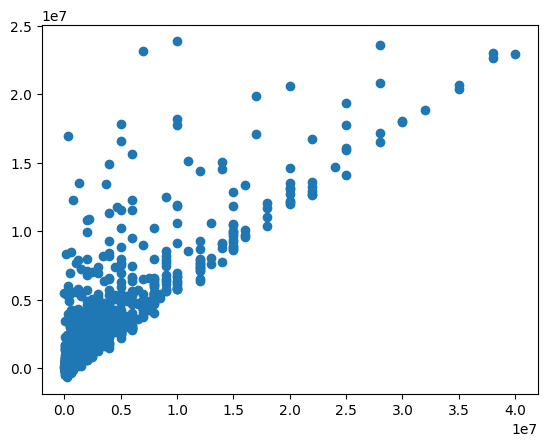

In [71]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

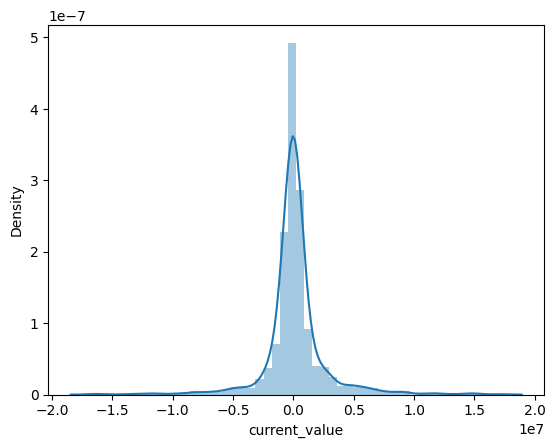

In [72]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

#### Cross Validation

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=7)  
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## Model 2

In [75]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [76]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [77]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [78]:
model.coef_

array([ 638501.2504605 , 3741096.24399623,  176849.53254626,
       -241009.99707301, -108346.93178197, -175869.39748337])

In [79]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
minutes played,6.385013e+05
highest_value,3.741096e+06
goals_total,1.768495e+05
yellow cards_total,-2.410100e+05
has_assists,-1.083469e+05
never_injured,-1.758694e+05


In [80]:
print(model.intercept_)

2590429.5787715716


In [98]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 100) 
lasso_model.fit(X_train, y_train) 

Lasso(alpha=100)

In [99]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
minutes played,363.575619
highest_value,0.559788
goals_total,21176.865102
yellow cards_total,-45665.998483
has_assists,-230198.121878
never_injured,-358121.321451


1. Mean Square Error

In [100]:
y_base = [y_train.mean()] * len(y_test)

In [101]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 24249161538547.598


In [102]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 6683990470010.358
Mean Squared Error for testing: 6625002875169.612


2. Mean Absolute Error

In [103]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2881178.951188072


In [104]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')


Mean Absolute Error for training: 1296645.173178829
Mean Absolute Error for testing: 1342466.7267682173


3. Root Mean Squared Error

In [105]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1697.4035911320773


In [106]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2585341.4610086535
Root Mean Squared Error for testing: 2573908.0937690088


4. R Square

In [107]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6961680494414269
R Square for testing: 0.7263375958124446


In [91]:
predictions = model.predict(X_test_scaled)
#predictions


In [92]:
Real_Values = np.array(y_test)
#Real_Values

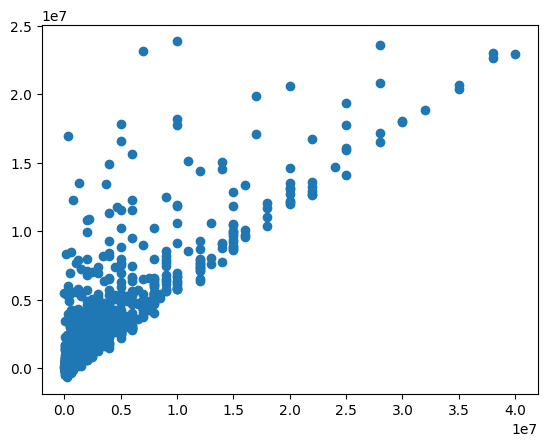

In [93]:
plt.scatter(Real_Values,predictions); 

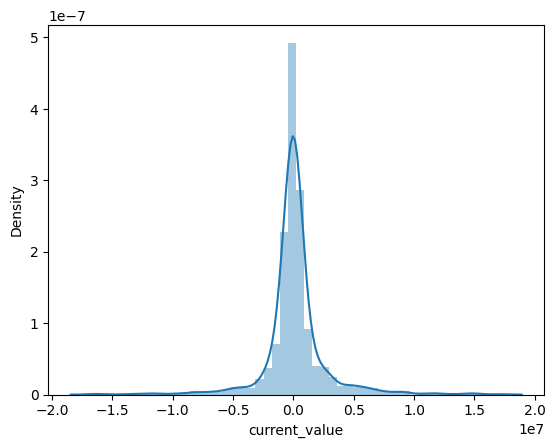

In [94]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution


In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=7)  
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 100}
Best Score: 0.6938663956940144
